                                                Libraries And Utilities

In [1]:
%matplotlib inline

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo

pyo.init_notebook_mode()
sns.set_style('darkgrid')

plt.rc('figure',figsize=(18,9))

                                                       Data Loading

In [2]:
data = pd.read_csv('BankChurners.csv')
data = data[data.columns[:-2]]
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

                                                 Exploratory Data Analysis

In [3]:
fig = make_subplots(rows = 2, cols = 1)

tr1 = go.Box(x = data['Customer_Age'], name = 'Age Box Plot', boxmean=True)
tr2 = go.Histogram(x = data['Customer_Age'], name = 'Age Histogram')

fig.add_trace(tr1, row = 1, col = 1)
fig.add_trace(tr2, row = 2, col = 1)

fig.update_layout(height = 700, width = 1200, title_text = "Distribution of Customer Ages")
fig.show()

In [4]:
ex.pie(data, names = 'Gender', title = 'Propotion Of Customer Genders')

In [5]:
fig = make_subplots(rows=2, cols=1)

tr1 = go.Box(x=data['Dependent_count'], name='Dependent count Box Plot', boxmean=True)
tr2 = go.Histogram(x=data['Dependent_count'], name='Dependent count Histogram')

fig.add_trace(tr1, row=1, col=1)
fig.add_trace(tr2, row=2, col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of Dependent counts (close family size)")
fig.show()

In [6]:
ex.pie(data, names='Education_Level', title='Propotion Of Education Levels')

In [7]:
ex.pie(data, names='Marital_Status', title='Propotion Of Different Marriage Statuses')

In [8]:
ex.pie(data,names='Income_Category',title='Propotion Of Different Income Levels')

In [9]:
ex.pie(data,names='Card_Category',title='Propotion Of Different Card Categories')

In [10]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=data['Months_on_book'],name='Months on book Box Plot',boxmean=True)
tr2=go.Histogram(x=data['Months_on_book'],name='Months on book Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of months the customer is part of the bank")
fig.show()

In [11]:
print('Kurtosis of Months on book features is : {}'.format(data['Months_on_book'].kurt()))

Kurtosis of Months on book features is : 0.40010012019986707


In [12]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=data['Total_Relationship_Count'],name='Total no. of products Box Plot',boxmean=True)
tr2=go.Histogram(x=data['Total_Relationship_Count'],name='Total no. of products Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of Total no. of products held by the customer")
fig.show()

In [13]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=data['Months_Inactive_12_mon'],name='number of months inactive Box Plot',boxmean=True)
tr2=go.Histogram(x=data['Months_Inactive_12_mon'],name='number of months inactive Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of the number of months inactive in the last 12 months")
fig.show()

In [14]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=data['Total_Trans_Amt'],name='Total_Trans_Amt Box Plot',boxmean=True)
tr2=go.Histogram(x=data['Total_Trans_Amt'],name='Total_Trans_Amt Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of the Total Transaction Amount (Last 12 months)")
fig.show()

In [15]:
ex.pie(data, names='Attrition_Flag', title='Proportion of churn vs not churn customers')

                                                 Data Preprocessing

In [16]:
data.Attrition_Flag = data.Attrition_Flag.replace({'Attrited Customer' : 1, 'Existing Customer': 0})
data.Gender = data.Gender.replace({'F':  1, 'M' : 0})
data = pd.concat([data,pd.get_dummies(data['Education_Level']).drop(columns = ['Unknown'])], axis=1)
data = pd.concat([data,pd.get_dummies(data['Income_Category']).drop(columns = ['Unknown'])], axis=1)
data = pd.concat([data,pd.get_dummies(data['Marital_Status']).drop(columns = ['Unknown'])], axis=1)
data = pd.concat([data,pd.get_dummies(data['Card_Category']).drop(columns = ['Platinum'])], axis=1)
data.drop(columns = ['Education_Level','Income_Category', 'Marital_Status', 'Card_Category', 'CLIENTNUM'], inplace=True)

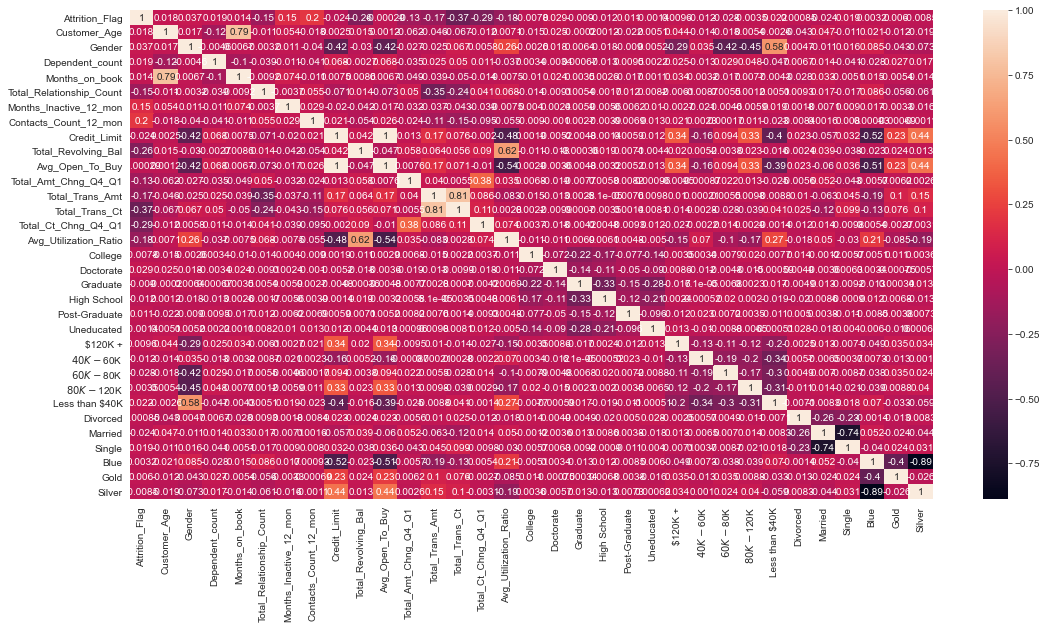

In [17]:
sns.heatmap(data.corr('pearson'),annot=True)

                                            Data Upsampling Using SMOTE

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
oversample = SMOTE()
X, y = oversample.fit_resample(data[data.columns[1:]], data[data.columns[0]])
usampled_df = X.assign(Churn = y)

In [20]:
ohe_data = usampled_df[usampled_df.columns[15:-1]].copy()

usampled_df = usampled_df.drop(columns=usampled_df.columns[15:-1])

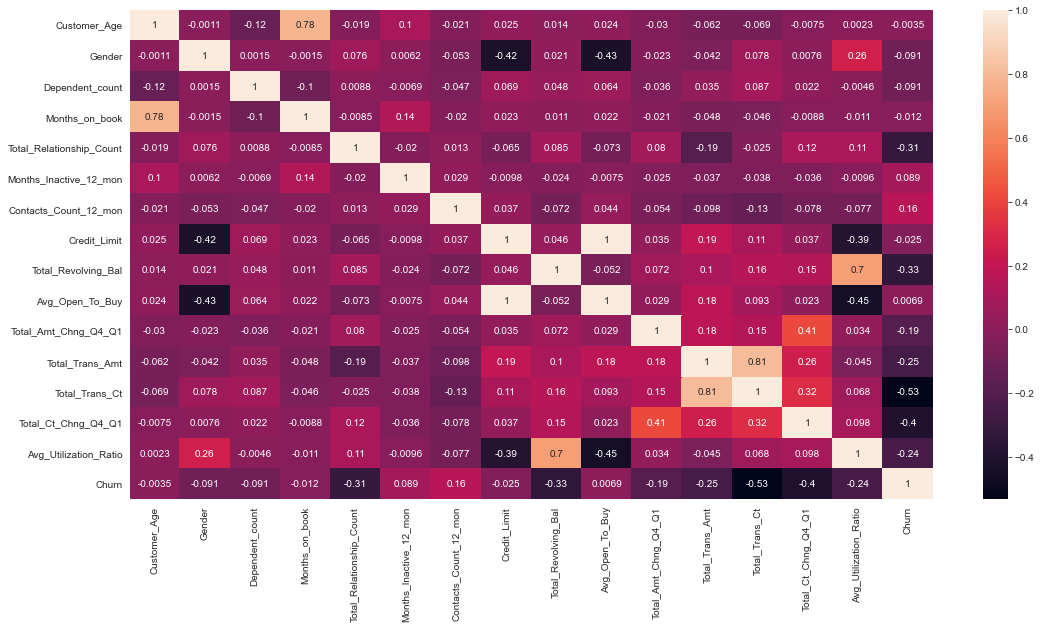

In [21]:
sns.heatmap(usampled_df.corr('pearson'),annot=True)

                                Principal Component Analysis Of One Hot Encoded Data

In [22]:
from sklearn.decomposition import PCA

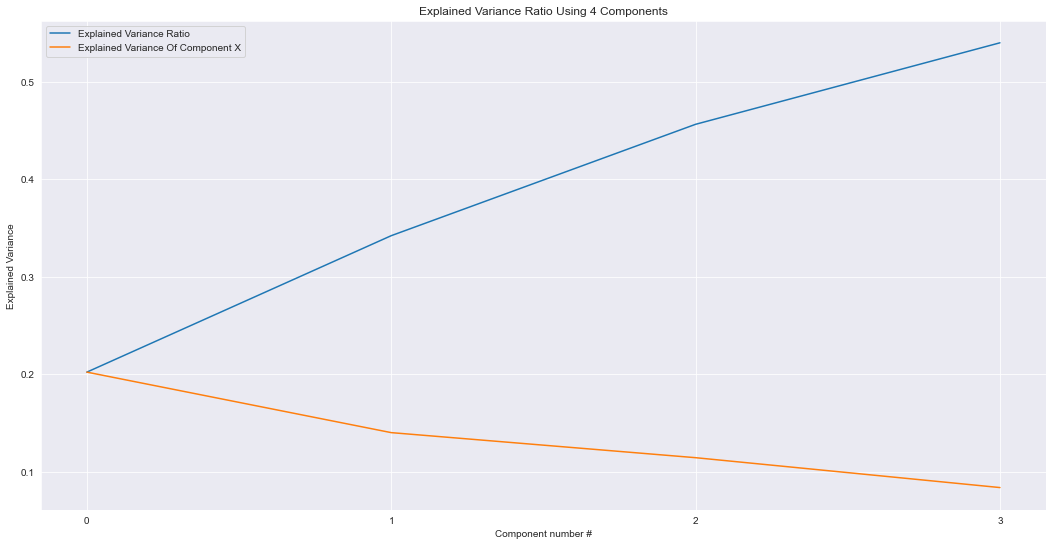

In [23]:
N_COMPONENTS = 4

pca_model = PCA(n_components = N_COMPONENTS )

pc_matrix = pca_model.fit_transform(ohe_data)

evr = pca_model.explained_variance_ratio_
cumsum_evr = np.cumsum(evr)

ax = sns.lineplot(x=np.arange(0,len(cumsum_evr)),y=cumsum_evr,label='Explained Variance Ratio')
ax.set_title('Explained Variance Ratio Using {} Components'.format(N_COMPONENTS))
ax = sns.lineplot(x=np.arange(0,len(cumsum_evr)),y=evr,label='Explained Variance Of Component X')
ax.set_xticks([i for i in range(0,len(cumsum_evr))])
ax.set_xlabel('Component number #')
ax.set_ylabel('Explained Variance')
plt.show()

In [24]:
usampled_df_with_pcs = pd.concat([usampled_df,pd.DataFrame(pc_matrix,columns=['PC-{}'.format(i) for i in range(0,N_COMPONENTS)])],axis=1)
usampled_df_with_pcs

Customer_Age  Gender  Dependent_count  Months_on_book  \
0                45       0                3              39   
1                49       1                5              44   
2                51       0                3              36   
3                40       1                4              34   
4                40       0                3              21   
...             ...     ...              ...             ...   
16995            46       1                2              39   
16996            48       0                2              33   
16997            55       0                1              45   
16998            50       0                2              39   
16999            47       0                3              39   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
16995                         5                       3   
16996                         3                       2   
16997                         4                       3   
16998                         2                       2   
16999                         1                       3   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3  12691.000000                  777   
1                          2   8256.000000                  864   
2                          0   3418.000000                    0   
3                          1   3313.000000                 2517   
4                          0   4716.000000                    0   
...                      ...           ...                  ...   
16995                      2   1438.300000                    0   
16996                      2   8966.290431                    0   
16997                      5   4576.232375                    0   
16998                      4  16324.017697                  197   
16999                      3   5588.084228                    0   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0         11914.000000              1.335000             1144              42   
1          7392.000000              1.541000             1291              33   
2          3418.000000              2.594000             1887              20   
3           796.000000              1.405000             1171              20   
4          4716.000000              2.175000              816              28   
...                ...                   ...              ...             ...   
16995      1438.300000              0.592391             2192              39   
16996      8966.290431              0.496902             1922              49   
16997      4576.232375              0.967800             9128              76   
16998     16126.235844              0.455441             1970              45   
16999      5588.084228              0.823410             8210              62   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Churn      PC-0      PC-1  \
0                 1.625000                 0.0610      0 -0.698514 -0.360524   
1                 3.714000                 0.1050      0  0.728394  0.892049   
2                 2.333000                 0.0000      0 -0.723886 -0.182499   
3                 2.333000                 0.7600      0  0.078527  0.613705   
4                 2.500000                 0.0000      0 -0.683831 -0.338602   
...                    ...                    ...    ...       ...       ...   
16995             0.567602                 0.0000      1  0.062712 -0.281603   
16996             0.815097                 0.0000      1  0.062712 -0.281603   
16997             1.154757     

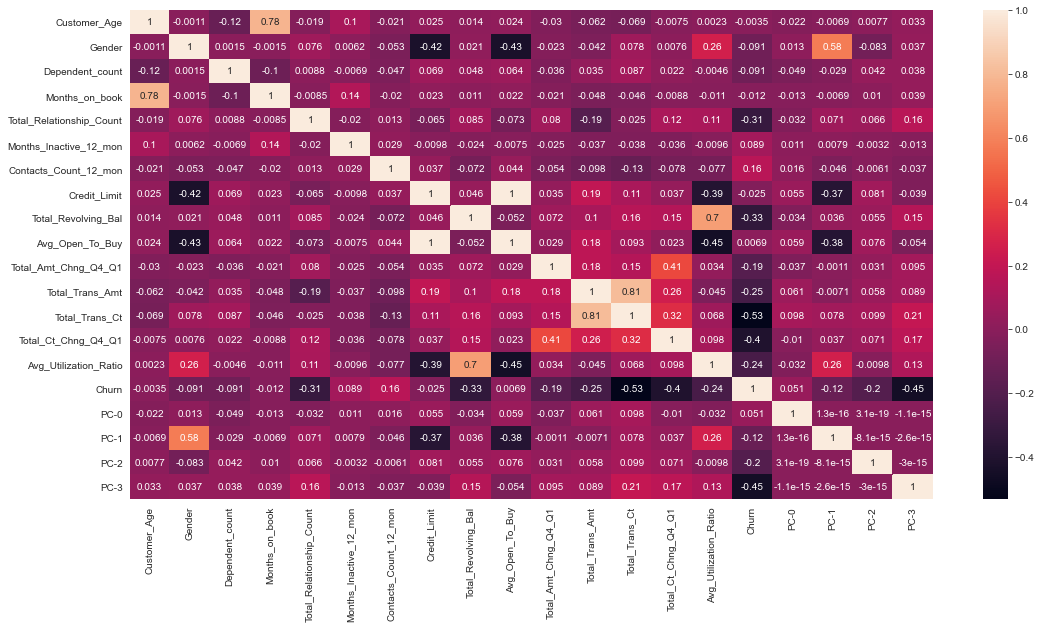

In [25]:
sns.heatmap(usampled_df_with_pcs.corr('pearson'),annot=True)

                                                   Model Selection

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_features = ['Total_Trans_Ct','PC-3','PC-1','PC-0','PC-2','Total_Ct_Chng_Q4_Q1','Total_Relationship_Count']

X = usampled_df_with_pcs[X_features]
y = usampled_df_with_pcs['Churn']

In [43]:
train_x,test_x,train_y,test_y = train_test_split(X,y,random_state=42)

                                                    Cross Validation

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1

In [30]:
rf_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",RandomForestClassifier(random_state=42)) ])
ada_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",AdaBoostClassifier(random_state=42,learning_rate=0.7)) ])
svm_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",SVC(random_state=42,kernel='rbf')) ])
xgb_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",XGBClassifier(random_state=42, n_jobs = 2)) ])


f1_cross_val_scores = cross_val_score(rf_pipe,train_x,train_y,cv=5,scoring='f1')
ada_f1_cross_val_scores=cross_val_score(ada_pipe,train_x,train_y,cv=5,scoring='f1')
svm_f1_cross_val_scores=cross_val_score(svm_pipe,train_x,train_y,cv=5,scoring='f1')
xgb_f1_cross_val_scores=cross_val_score(xgb_pipe,train_x,train_y,cv=5,scoring='f1')

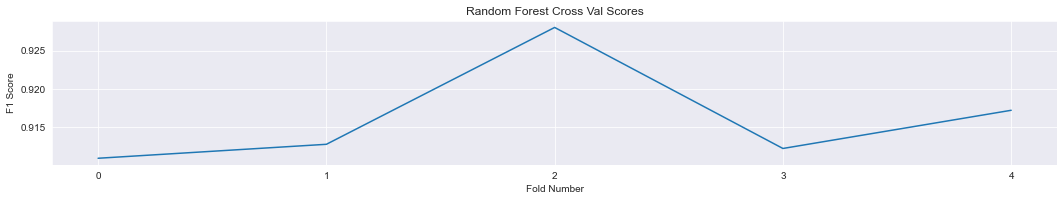

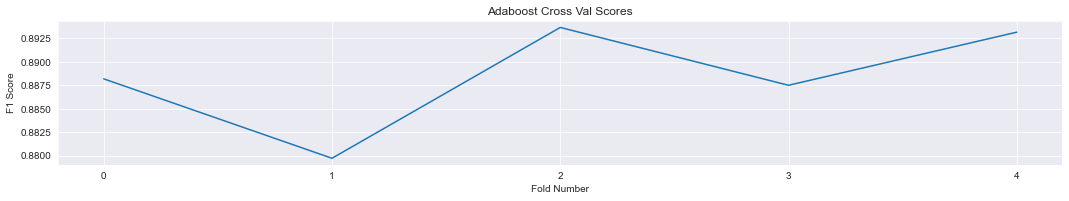

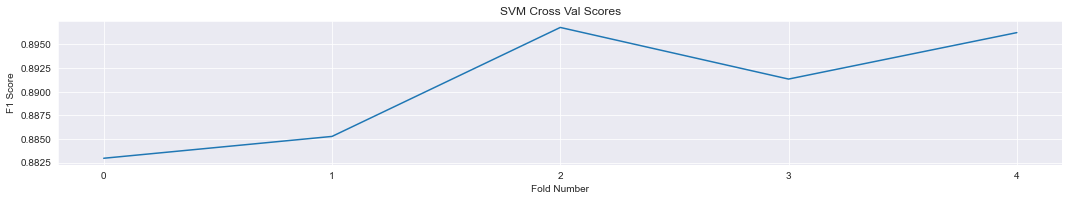

In [31]:
plt.subplot(3,1,1)
ax = sns.lineplot(x=range(0,len(f1_cross_val_scores)),y=f1_cross_val_scores)
ax.set_title('Random Forest Cross Val Scores')
ax.set_xticks([i for i in range(0,len(f1_cross_val_scores))])
ax.set_xlabel('Fold Number')
ax.set_ylabel('F1 Score')
plt.show()

plt.subplot(3,1,2)
ax = sns.lineplot(x=range(0,len(ada_f1_cross_val_scores)),y=ada_f1_cross_val_scores)
ax.set_title('Adaboost Cross Val Scores')
ax.set_xticks([i for i in range(0,len(ada_f1_cross_val_scores))])
ax.set_xlabel('Fold Number')
ax.set_ylabel('F1 Score')
plt.show()

plt.subplot(3,1,3)
ax = sns.lineplot(x=range(0,len(svm_f1_cross_val_scores)),y=svm_f1_cross_val_scores)
ax.set_title('SVM Cross Val Scores')
ax.set_xticks([i for i in range(0,len(svm_f1_cross_val_scores))])
ax.set_xlabel('Fold Number')
ax.set_ylabel('F1 Score')
plt.show()

# plt.subplot(3,1,4)
# ax = sns.lineplot(x=range(0,len(xgb_f1_cross_val_scores)),y=xgb_f1_cross_val_scores)
# ax.set_title('XGB Cross Val Scores')
# ax.set_xticks([i for i in range(0,len(xgb_f1_cross_val_scores))])
# ax.set_xlabel('Fold Number')
# ax.set_ylabel('F1 Score')
# plt.show()

                                                   Model Evaluation

In [45]:
rf_pipe.fit(train_x, train_y)
rf_prediction = rf_pipe.predict(test_x)

ada_pipe.fit(train_x, train_y)
ada_prediction = ada_pipe.predict(test_x)

svm_pipe.fit(train_x, train_y)
svm_prediction = svm_pipe.predict(test_x)

xgb_pipe.fit(train_x, train_y)
xgb_prediction = xgb_pipe.predict(test_x)

print('F1 Score of Random Forest Model On Test Set - {}'.format(f1(rf_prediction,test_y)))
print('F1 Score of AdaBoost Model On Test Set - {}'.format(f1(ada_prediction,test_y)))
print('F1 Score of SVM Model On Test Set - {}'.format(f1(svm_prediction,test_y)))
print('F1 Score of XGB Model On Test Set - {}'.format(f1(xgb_prediction,test_y)))

F1 Score of Random Forest Model On Test Set - 0.9091780493649652
F1 Score of AdaBoost Model On Test Set - 0.8891520606347701
F1 Score of SVM Model On Test Set - 0.8947999041456985
F1 Score of XGB Model On Test Set - 0.9132507149666348


                                                     Before Upsampling

In [42]:
train_X, x_test, train_Y, y_test = train_test_split(data[data.columns[1:]], data[data.columns[0]], random_state=42)

In [34]:
rf_pipe.fit(train_X,train_Y)
rf_prediction = rf_pipe.predict(x_test)

ada_pipe.fit(train_X,train_Y)
ada_prediction = ada_pipe.predict(x_test)

svm_pipe.fit(train_X,train_Y)
svm_prediction = svm_pipe.predict(x_test)

xgb_pipe.fit(train_X,train_Y)
xgb_prediction = xgb_pipe.predict(x_test)

print('F1 Score of Random Forest Model On Test Set - {}'.format(f1(rf_prediction,y_test)))
print('F1 Score of AdaBoost Model On Test Set - {}'.format(f1(ada_prediction,y_test)))
print('F1 Score of SVM Model On Test Set - {}'.format(f1(svm_prediction,y_test)))
print('F1 Score of XGB Model On Test Set - {}'.format(f1(xgb_prediction,y_test)))

F1 Score of Random Forest Model On Test Set - 0.8291390728476822
F1 Score of AdaBoost Model On Test Set - 0.821566110397946
F1 Score of SVM Model On Test Set - 0.6820143884892086
F1 Score of XGB Model On Test Set - 0.8924205378973106


                                               Tuning Hyperparameters

In [35]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [36]:
xgb = XGBClassifier(n_jobs = 2) 

param_grid = {
                  'n_estimators' :[20, 30, 40, 50, 60, 100,150,200],
                  "learning_rate" : [0.001,0.01,0.0001, 0.05, 0.1, 0.125, 0.15],
                  "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4, 0.5 ],
                  "colsample_bytree" : [0.2, 0.4, 0.5, 0.6, 0.8, 1],
                  'max_depth': [3, 4, 5, 6, 7, 8],
                    'gamma' : [0, 0.2, 0.4, 0.6, 1],
                    'min_child_weight' : [0.5, 1, 2, 4, 5, 8, 10],
                    'subsample' : [0.5, 0.8, 1],
                    'reg_alpha' : [0, 0.1, 0.2, 0.5, 0.8, 1],
                    'reg_lambda' : [1, 1.2, 1.5, 1.8, 2],
                    'scale_pos_weight': [1, 3, 5, 10,15,20]
              }

In [37]:
xgb_randomgrid = RandomizedSearchCV(xgb, param_distributions = param_grid, cv = 5)

In [38]:
%%time
xgb_randomgrid.fit(train_x, train_y)

Wall time: 44.1 s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                   param_distributions={'colsample_bytree': [0.2, 0.4, 0.5, 0.6,
                                                             0.8, 1],
                              

In [39]:
best_est = xgb_randomgrid.best_estimator_

In [40]:
y_pred = best_est.predict(test_x)

In [44]:
print('F1 Score of XGB Model On Test Set - {}'.format(f1(y_pred, test_y)))

F1 Score of XGB Model On Test Set - 0.879959565327268


In [ ]:
from sklearn.metrics import auc, roc_curve
fpr,tpr,_ = roc_curve(test_y, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()